In [2]:
#Set up google colab working environment
%cd ~/../content
%rm -rf Colombian-peso-counterfeit-detection
!git clone https://github.com/zrosen3/Colombian-peso-counterfeit-detection.git 
%cd /content/Colombian-peso-counterfeit-detection/Code 

/content
Cloning into 'Colombian-peso-counterfeit-detection'...
remote: Enumerating objects: 21414, done.
remote: Counting objects: 100% (449/449), done.
remote: Compressing objects: 100% (206/206), done.
remote: Total 21414 (delta 276), reused 404 (delta 241), pack-reused 20965
Receiving objects: 100% (21414/21414), 446.13 MiB | 27.54 MiB/s, done.
Resolving deltas: 100% (370/370), done.
Updating files: 100% (62422/62422), done.
/content/Colombian-peso-counterfeit-detection/Code


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import common_functions as cf
from keras import models
from keras import layers

# ANN

## Load Data

In [5]:
train_ds, test_ds, validation_ds, class_names = cf.LoadData()


Found 12479 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.


## Run model

In [26]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)
#Define model
model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(480, 640, 3)),
            tf.keras.layers.Rescaling(1./255),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256),
            tf.keras.layers.Dense(128),
            tf.keras.layers.Dense(128),
            tf.keras.layers.Dense(
                  units = 13,
                activation = "softmax"
          )])
        
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


In [27]:
#Fit model
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=5)

Epoch 1/5
390/390 [==============================] - 21s 49ms/step - loss: 101.9762 - accuracy: 0.5471 - val_loss: 7.6826 - val_accuracy: 0.6673
Epoch 2/5
390/390 [==============================] - 19s 48ms/step - loss: 10.6307 - accuracy: 0.7028 - val_loss: 10.7614 - val_accuracy: 0.7127
Epoch 3/5
390/390 [==============================] - 19s 48ms/step - loss: 5.0602 - accuracy: 0.7951 - val_loss: 9.3911 - val_accuracy: 0.7745
Epoch 4/5
390/390 [==============================] - 19s 48ms/step - loss: 41.1068 - accuracy: 0.6779 - val_loss: 7.3696 - val_accuracy: 0.7526
Epoch 5/5
390/390 [==============================] - 19s 48ms/step - loss: 2.7008 - accuracy: 0.8838 - val_loss: 2.3668 - val_accuracy: 0.8861


# Model evaluation metrics

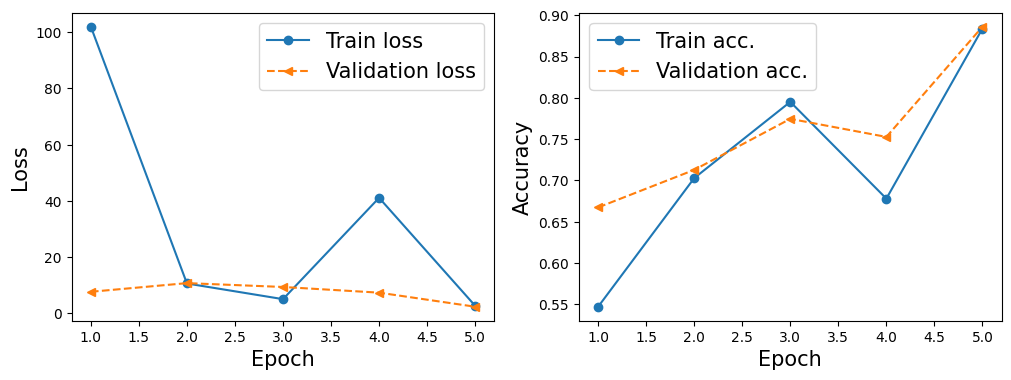

130/130 - 5s - loss: 162.5536 - accuracy: 0.2111 - 5s/epoch - 36ms/step
Test loss: 162.55361938476562 | Test accuracy: 0.21105769276618958


(0.8838047981262207, 0.8860576748847961, 0.21105769276618958)

In [28]:
cf.EvaluateModel(model, test_ds.map(cf.AugmentImage(contrast=0.5)), history)

Macro averaged precision score: 0.8882211538461539
Macro averaged recall score: 0.9091383940240594
Macro averaged F1 score: 0.8860610434686921


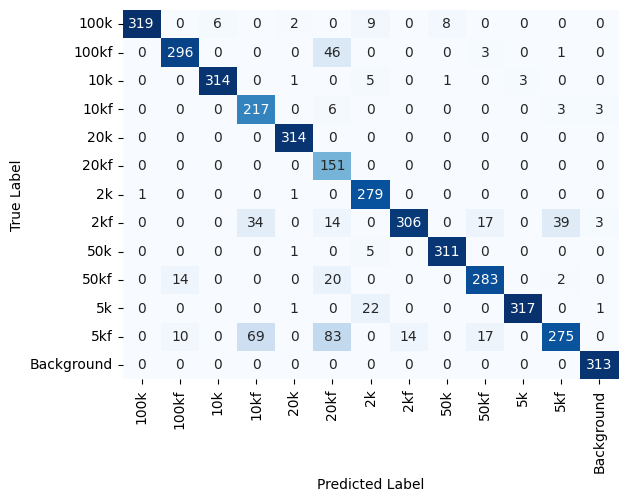

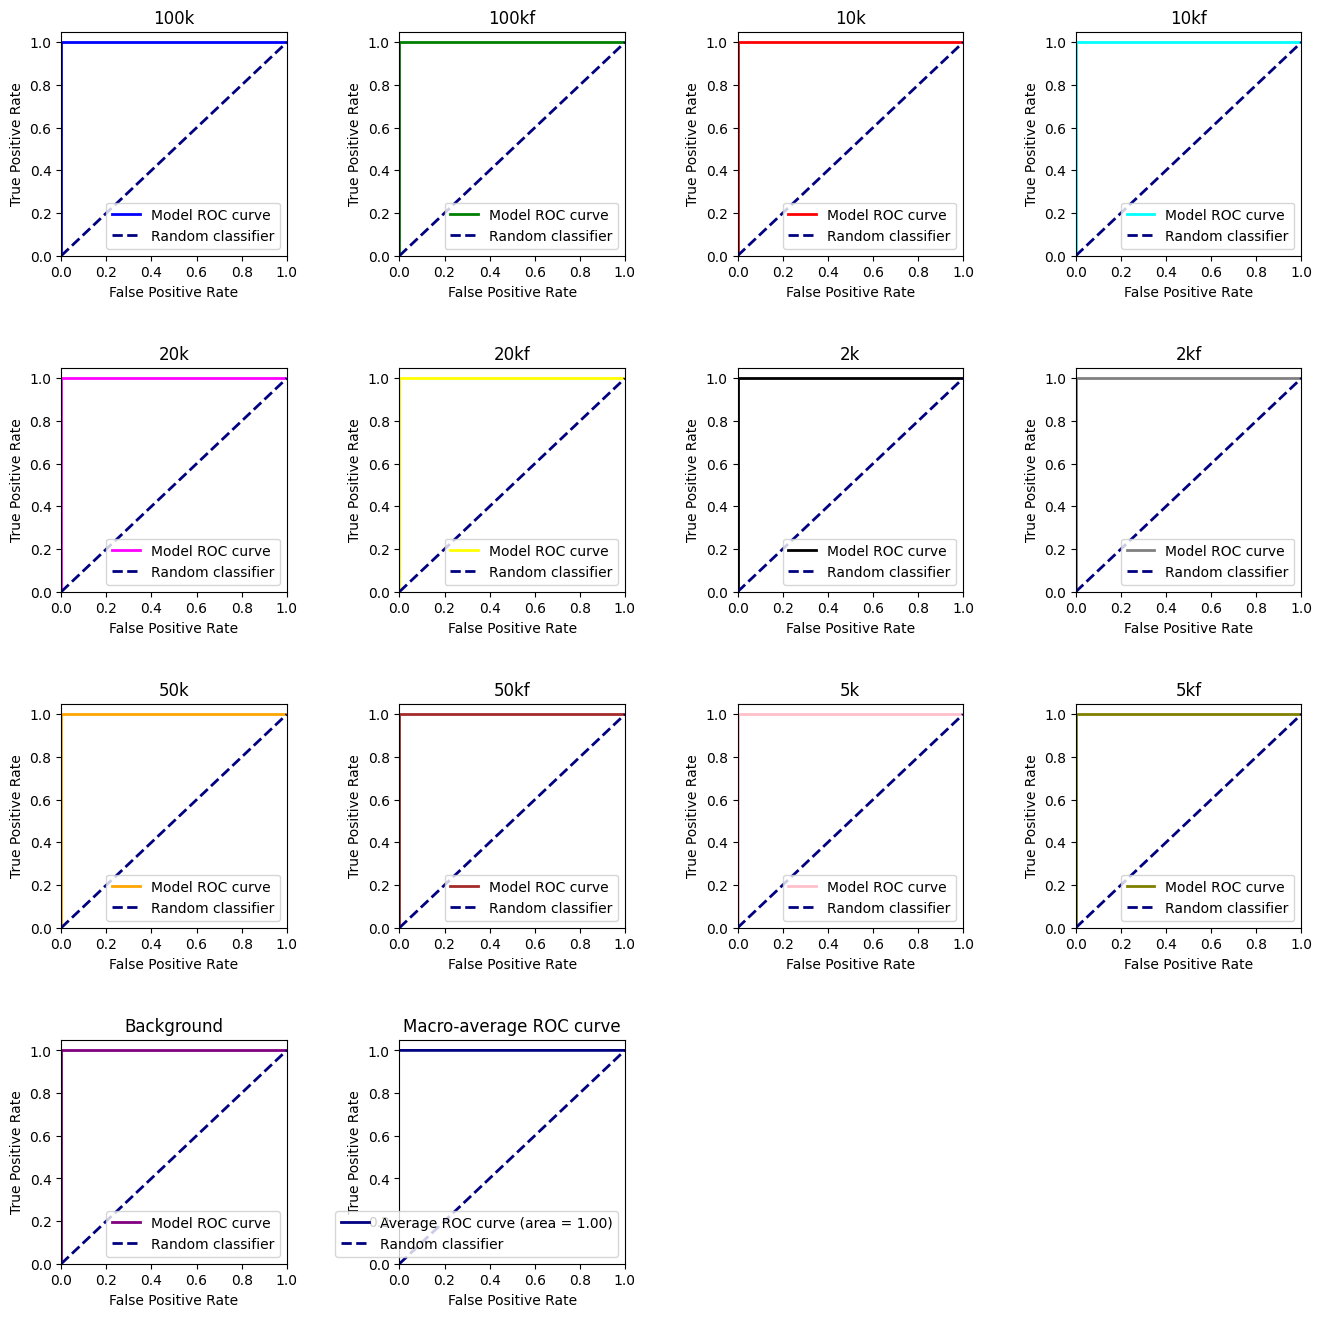

In [29]:
cf.precision_recall_metrics(model, test_ds, class_names)